## Aprendizado Multiobjetivo em Modelos Supervisionados

**Dupla**: Beatriz Evelyn Dalfior (22.1.8012), Amanda Jacomette Dias Barbosa (22.1.8025)

**Disciplina**: Aprendizagem de Máquina (CSI704)

**Professor**: Luiz Carlos Bambirra Torres

---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

---

### 1. Base de Dados:
O dataset utilizado nesse código é o [Spambase](https://archive.ics.uci.edu/dataset/94/spambase), o qual contém 4601 instâncias e 57 features. Utilizamos métodos de **classificação** para predição e análise, com a variável **spam or not spam** como **target**.

In [3]:
# ------------------ SPAMBASE ------------------

# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 

  

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [4]:
# -------------------------  Preprocess dataset -------------------------
# Juntar X e y primeiro para garantir consistência
df = pd.concat([X, y], axis=1)

# Verificar e tratar valores faltantes
print("Valores faltantes antes do tratamento:")
print(df.isnull().sum())

# Preencher valores faltantes (se necessário)
df.fillna(df.mean(), inplace=True)

# Verificar se ainda há valores faltantes
print("\nValores faltantes após o tratamento:")
print(df.isnull().sum().sum())

# Separar novamente X e y após o tratamento
X = df.drop(columns=['word_freq_650', 'word_freq_george', 'Class'])
y = df[y.columns]

# Verificar consistência no tamanho
print("\nNúmero de amostras em X e y:")
print(len(X), len(y)) 


Valores faltantes antes do tratamento:
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
w

In [5]:
# ------------------------- Data Preparation -------------------------
# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------- Train/Test split -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [6]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("\nShapes após train/test split:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


print("\nValores NaN em X_train:", X_train.isna().sum().sum())
print("Valores NaN em y_train:", y_train.isna().sum().sum())


Shapes após train/test split:
X_train: (3220, 55), y_train: (3220, 1)
X_test: (1381, 55), y_test: (1381, 1)

Valores NaN em X_train: 0
Valores NaN em y_train: 0


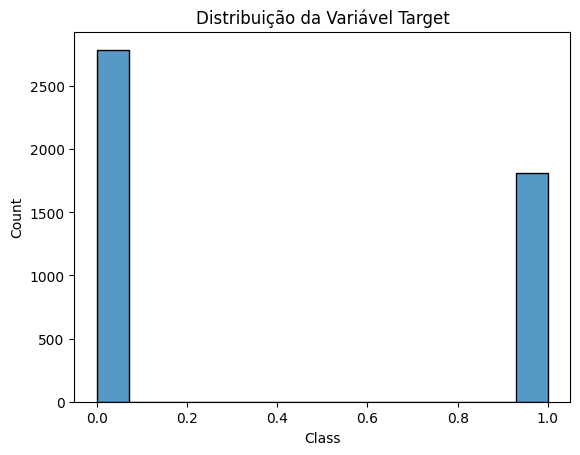

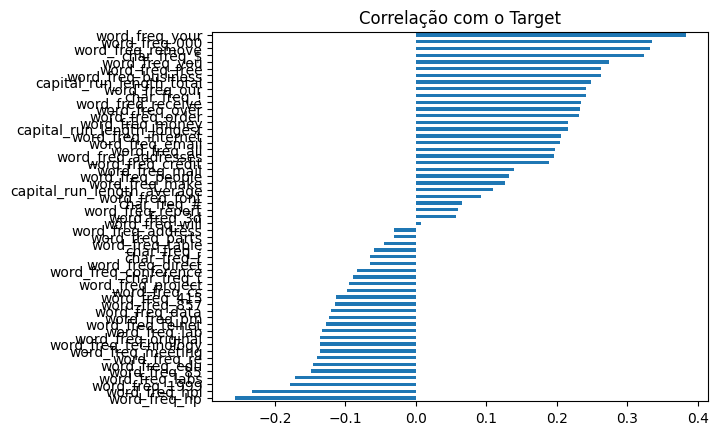

In [8]:
# Verificar distribuição do target

sns.histplot(y.iloc[:, 0]) # y.iloc[:, 0]
plt.title('Distribuição da Variável Target')
plt.show()

# Correlação entre features numéricas e target
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
correlations = df[numeric_features].corrwith(y.iloc[:, 0])

correlations.sort_values().plot.barh()
plt.title('Correlação com o Target')
plt.show()

---

### 2. Modelagem com Algoritmos Supervisionados:
Utilizamos três modelos com diferentes arquiteturas/configurações, sendo eles:
- **Rede Neural (MLP Classifier):** Com camadas escondidas (hidden layers) variando de 50, 100, 200, 300 e 500;
- **Árvore de Decisão:** Sendo as profundidades máximas 3, 5, 10, 20 e nenhuma;
- **Random Forest:** Sendo o número de árvores 50, 100 e 200 e profundidades máximas como 5, 10, 30 e nenhuma.

Além disso, estaremos extraindo de cada modelo e configuração as features mais **relevantes** e métricas de desempenho, como a acurácia e F1 score.


Features mais relevantes para Random Forest - Profundidade máxima 5 | Árvores 50:
             Feature  Importance
50       char_freq_$    0.139110
6   word_freq_remove    0.104674
49       char_freq_!    0.091549
20    word_freq_your    0.090923
15    word_freq_free    0.081492


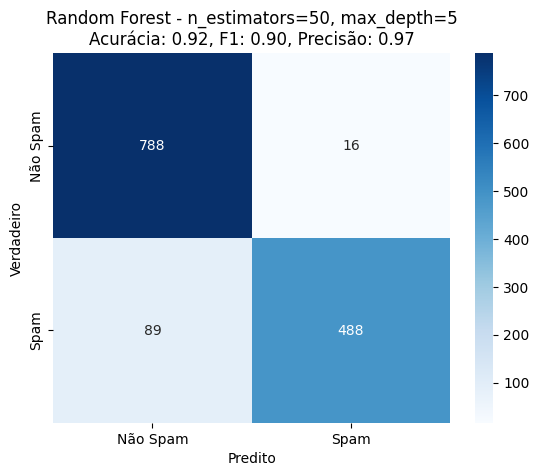


Features mais relevantes para Random Forest - Profundidade máxima 10 | Árvores 50:
             Feature  Importance
50       char_freq_$    0.126454
6   word_freq_remove    0.101238
49       char_freq_!    0.094883
20    word_freq_your    0.086239
15    word_freq_free    0.082797


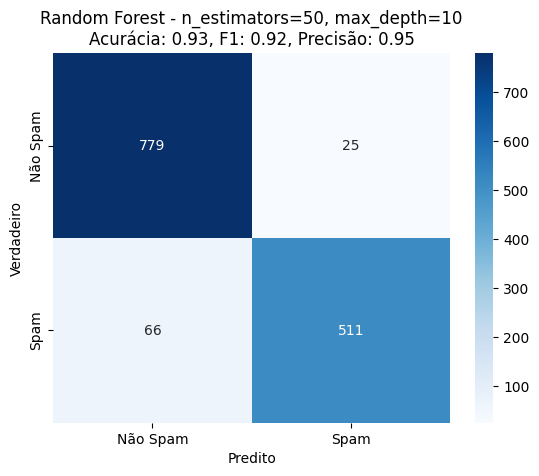


Features mais relevantes para Random Forest - Profundidade máxima 30 | Árvores 50:
             Feature  Importance
50       char_freq_$    0.128894
49       char_freq_!    0.106996
6   word_freq_remove    0.086947
20    word_freq_your    0.084076
15    word_freq_free    0.079767


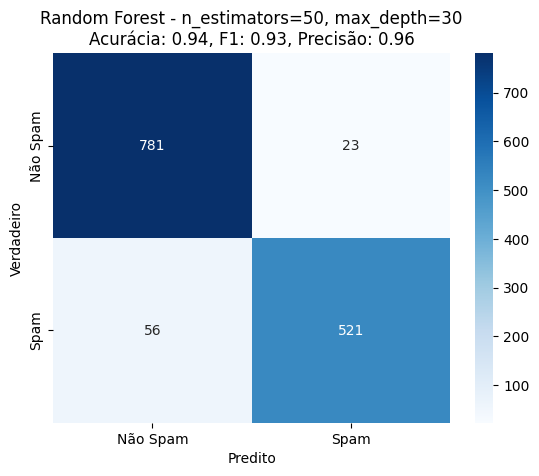


Features mais relevantes para Random Forest - Profundidade máxima None | Árvores 50:
             Feature  Importance
50       char_freq_$    0.128921
49       char_freq_!    0.106467
6   word_freq_remove    0.087954
20    word_freq_your    0.084039
15    word_freq_free    0.079677


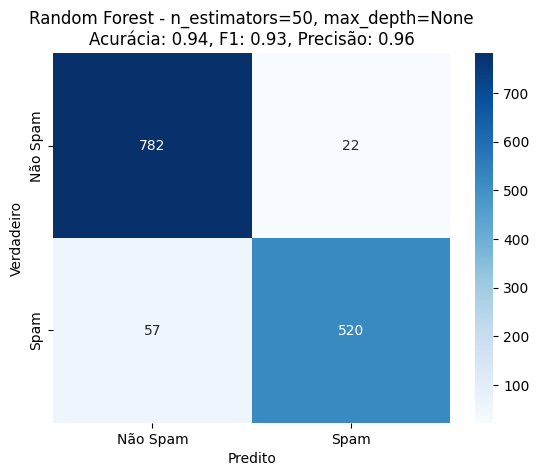


Features mais relevantes para Random Forest - Profundidade máxima 5 | Árvores 100:
                       Feature  Importance
6             word_freq_remove    0.150676
50                 char_freq_$    0.115967
49                 char_freq_!    0.107812
52  capital_run_length_average    0.074017
20              word_freq_your    0.073138


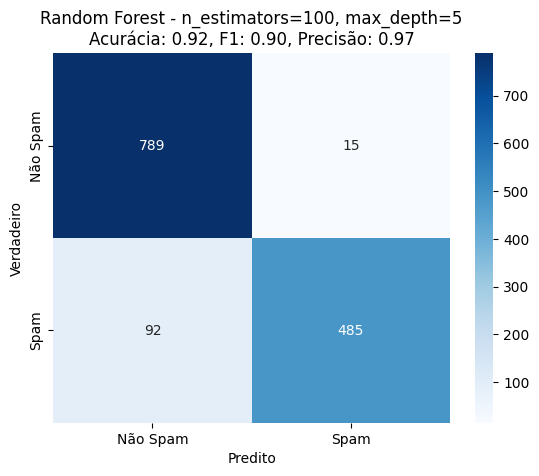


Features mais relevantes para Random Forest - Profundidade máxima 10 | Árvores 100:
                       Feature  Importance
6             word_freq_remove    0.132258
49                 char_freq_!    0.107987
50                 char_freq_$    0.107896
15              word_freq_free    0.070729
52  capital_run_length_average    0.070688


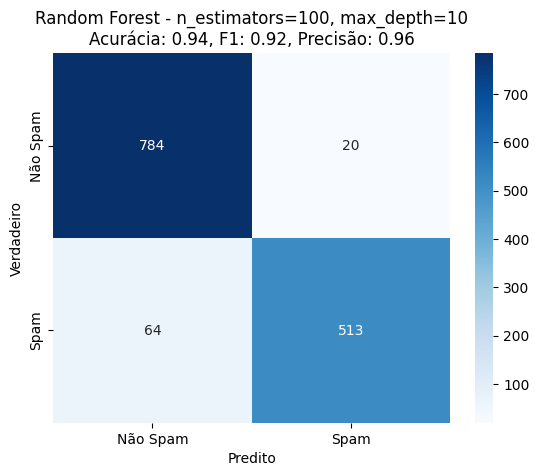


Features mais relevantes para Random Forest - Profundidade máxima 30 | Árvores 100:
                       Feature  Importance
6             word_freq_remove    0.123469
49                 char_freq_!    0.114908
50                 char_freq_$    0.106328
52  capital_run_length_average    0.072589
15              word_freq_free    0.070461


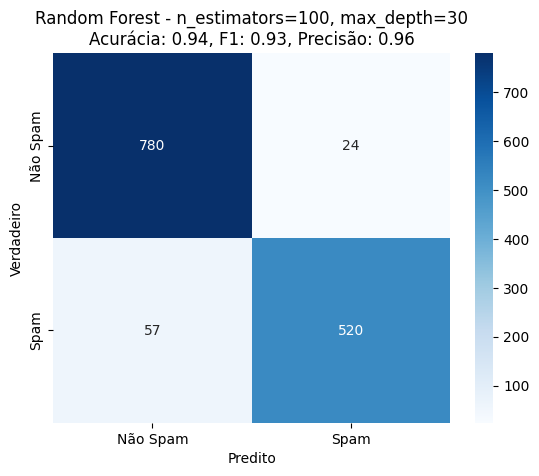


Features mais relevantes para Random Forest - Profundidade máxima None | Árvores 100:
                       Feature  Importance
6             word_freq_remove    0.123972
49                 char_freq_!    0.114643
50                 char_freq_$    0.106342
52  capital_run_length_average    0.073089
15              word_freq_free    0.070416


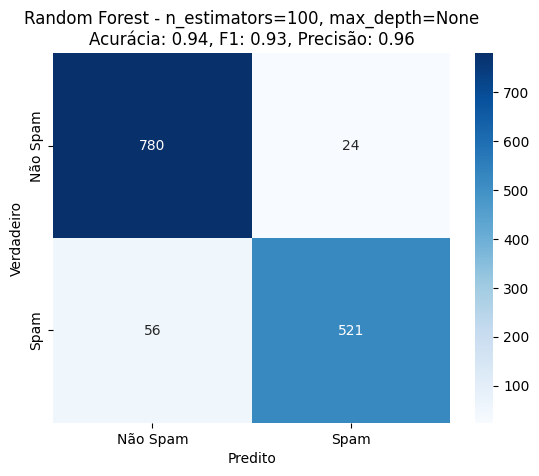


Features mais relevantes para Random Forest - Profundidade máxima 5 | Árvores 200:
             Feature  Importance
6   word_freq_remove    0.123148
50       char_freq_$    0.120303
49       char_freq_!    0.112515
15    word_freq_free    0.086298
20    word_freq_your    0.076495


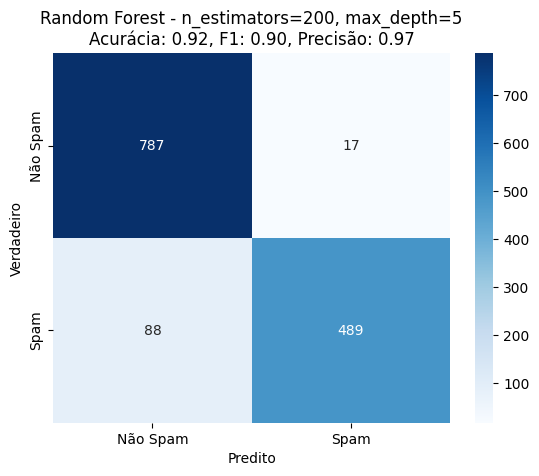


Features mais relevantes para Random Forest - Profundidade máxima 10 | Árvores 200:
             Feature  Importance
49       char_freq_!    0.124168
6   word_freq_remove    0.112044
50       char_freq_$    0.108517
15    word_freq_free    0.081137
20    word_freq_your    0.068003


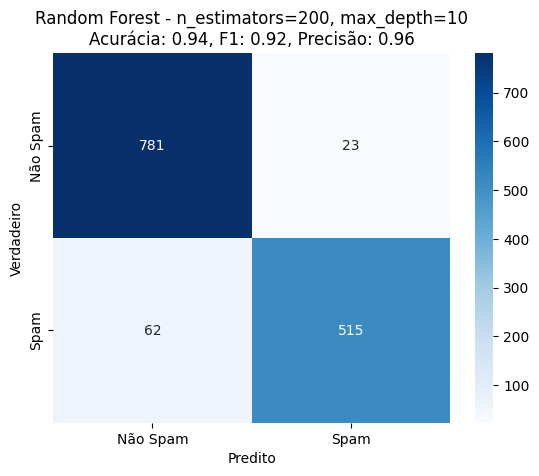


Features mais relevantes para Random Forest - Profundidade máxima 30 | Árvores 200:
             Feature  Importance
49       char_freq_!    0.119838
50       char_freq_$    0.108400
6   word_freq_remove    0.104246
15    word_freq_free    0.081013
20    word_freq_your    0.069482


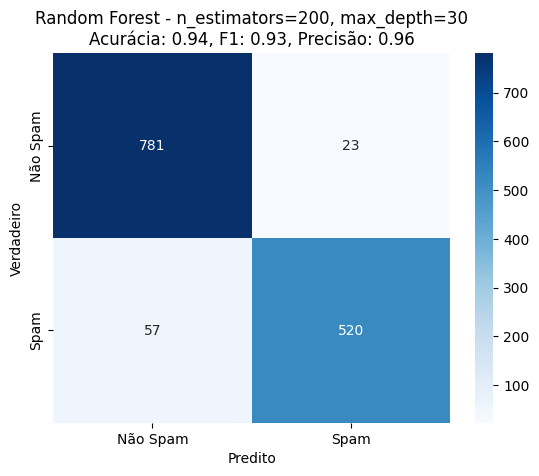


Features mais relevantes para Random Forest - Profundidade máxima None | Árvores 200:
             Feature  Importance
49       char_freq_!    0.119706
50       char_freq_$    0.108407
6   word_freq_remove    0.104497
15    word_freq_free    0.080991
20    word_freq_your    0.069473


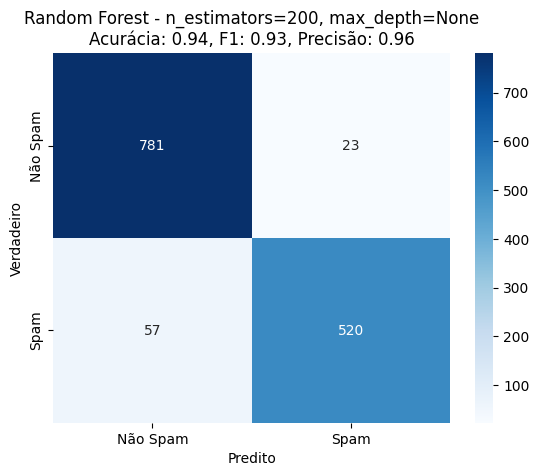

In [9]:
# ------------------------- Random Forest Classfier -------------------------

n_estimators_list = [50, 100, 200]      # Número de árvores
max_depth_list = [5, 10, 30, None]      # Profundidade máxima

results_rf = []

# Verificar e garantir que y_train seja 1D
if len(y_train.shape) > 1 and y_train.shape[1] == 1:
    y_train = y_train.values.ravel()

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        RFC = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_leaf=5, 
            n_jobs=1,
            random_state=42
        )
        RFC.fit(X_train, y_train)
        
        # Métricas
        y_pred = RFC.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        
        # Complexidade
        avg_depth = np.mean([tree.tree_.max_depth for tree in RFC.estimators_])
        n_params = sum(tree.tree_.n_node_samples.size for tree in RFC.estimators_)
        
        results_rf.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'avg_depth': avg_depth,
            'n_params': n_params,
            'Accuracy': acc,
            'F1_score': f1,
            'Precision': precision
        })

        # Guardando features relevantes
        feature_importance = RFC.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': feature_importance
        }).sort_values('Importance', ascending=False)

        print(f"\nFeatures mais relevantes para Random Forest - Profundidade máxima {max_depth} | Árvores {n_estimators}:")
        print(importance_df.head())

        # Plotagem das predições
        
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Não Spam', 'Spam'], 
                yticklabels=['Não Spam', 'Spam'])
        plt.title(f'Random Forest - n_estimators={n_estimators}, max_depth={max_depth}\nAcurácia: {acc:.2f}, F1: {f1:.2f}, Precisão: {precision:.2f}')
        plt.ylabel('Verdadeiro')
        plt.xlabel('Predito')
        plt.show()




=== Modelo com profundidade máxima 3 ===

Features mais relevantes para Decision Tree - Profundidade máxima 3:
             Feature  Importance
50       char_freq_$    0.528359
6   word_freq_remove    0.251757
49       char_freq_!    0.112791
24      word_freq_hp    0.083538
43     word_freq_edu    0.023555


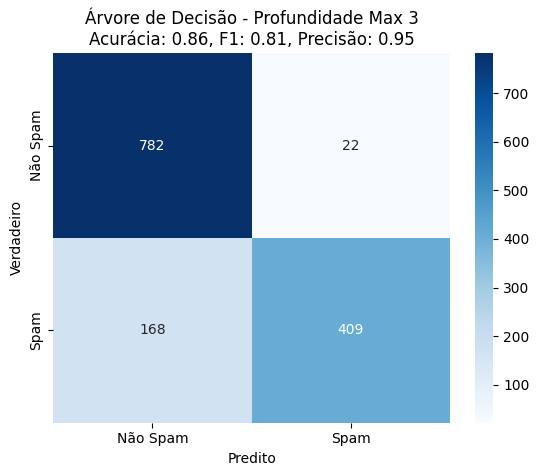


=== Modelo com profundidade máxima 5 ===

Features mais relevantes para Decision Tree - Profundidade máxima 5:
                       Feature  Importance
50                 char_freq_$    0.452124
6             word_freq_remove    0.222442
49                 char_freq_!    0.097510
24                word_freq_hp    0.071484
52  capital_run_length_average    0.055097


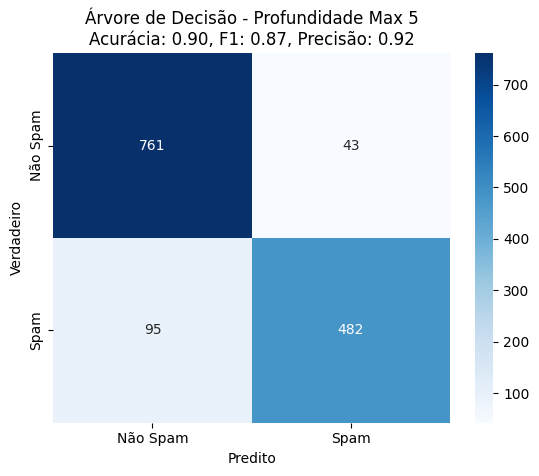


=== Modelo com profundidade máxima 10 ===

Features mais relevantes para Decision Tree - Profundidade máxima 10:
                       Feature  Importance
50                 char_freq_$    0.393723
6             word_freq_remove    0.194238
49                 char_freq_!    0.093307
24                word_freq_hp    0.065518
52  capital_run_length_average    0.048782


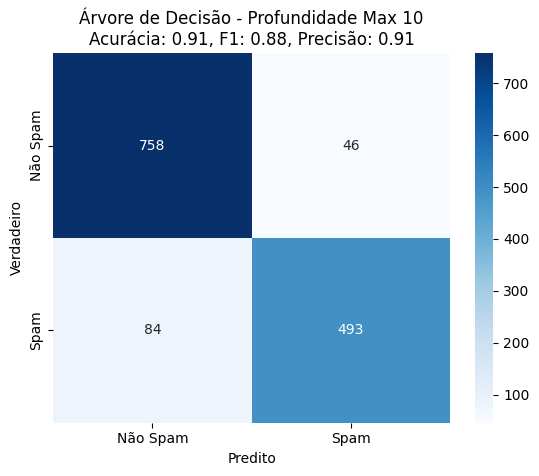


=== Modelo com profundidade máxima 20 ===

Features mais relevantes para Decision Tree - Profundidade máxima 20:
                       Feature  Importance
50                 char_freq_$    0.375130
6             word_freq_remove    0.184937
49                 char_freq_!    0.088023
24                word_freq_hp    0.062381
52  capital_run_length_average    0.054935


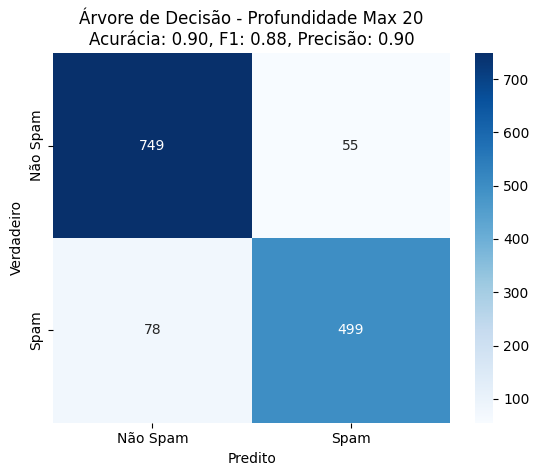


=== Modelo com profundidade máxima None ===

Features mais relevantes para Decision Tree - Profundidade máxima None:
                       Feature  Importance
50                 char_freq_$    0.375165
6             word_freq_remove    0.186123
49                 char_freq_!    0.089987
24                word_freq_hp    0.062430
52  capital_run_length_average    0.054693


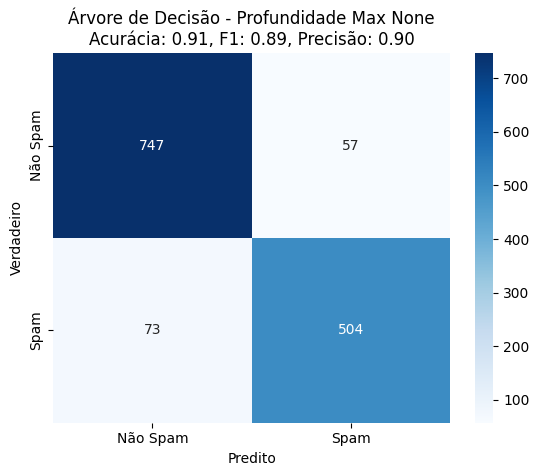

In [10]:
# ------------------------- Decision Tree Classifier -------------------------

max_depth_list = [3, 5, 10, 20, None]
results_dt = []

for max_depth in max_depth_list:
    print(f"\n=== Modelo com profundidade máxima {max_depth} ===")
    DTC = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_leaf=5, 
        random_state=42
    )
    DTC.fit(X_train, y_train)
    
    # Métricas
    y_pred = DTC.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Complexidade
    n_nodes = DTC.tree_.node_count
    depth = DTC.tree_.max_depth
    
    results_dt.append({
        'max_depth_set': max_depth,
        'actual_depth': depth,
        'n_nodes': n_nodes,
        'Accuracy': acc,
        'F1_score': f1,
        'Precision': precision
        
    })

    # Guardando features relevantes
    feature_importance = DTC.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)

    print(f"\nFeatures mais relevantes para Decision Tree - Profundidade máxima {max_depth}:")
    print(importance_df.head())


    # Plotagem das predições

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Não Spam', 'Spam'], 
                yticklabels=['Não Spam', 'Spam'])
    plt.title(f'Árvore de Decisão - Profundidade Max {max_depth}\nAcurácia: {acc:.2f}, F1: {f1:.2f}, Precisão: {precision:.2f}')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.show()




=== Modelo com 50 camadas ===

Top 5 features mais relevantes:
                       Feature  Importance
52  capital_run_length_average    0.485346
43               word_freq_edu    0.441846
24                word_freq_hp    0.378676
1            word_freq_address    0.365751
42                word_freq_re    0.350387


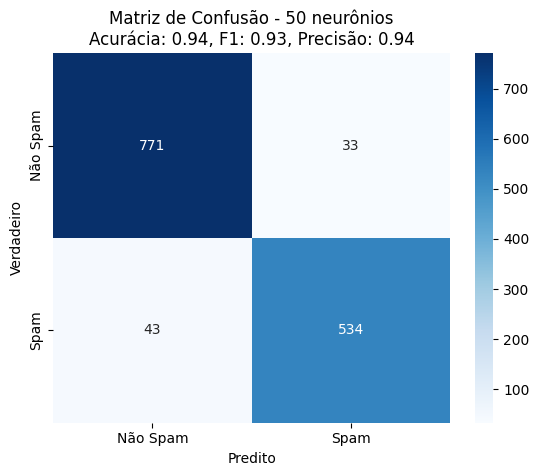


=== Modelo com 100 camadas ===

Top 5 features mais relevantes:
                       Feature  Importance
52  capital_run_length_average    0.322514
43               word_freq_edu    0.318695
24                word_freq_hp    0.303018
36                word_freq_pm    0.252870
1            word_freq_address    0.248646


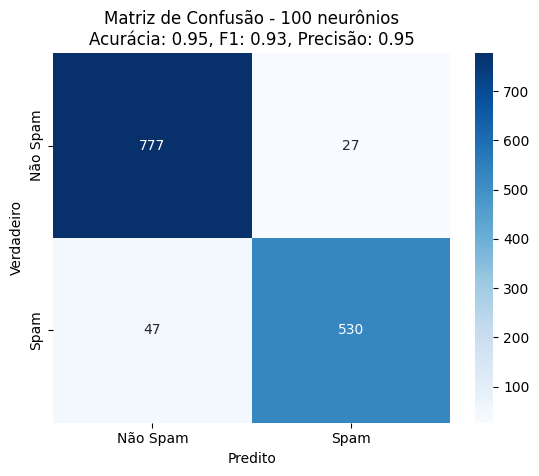


=== Modelo com 200 camadas ===

Top 5 features mais relevantes:
                       Feature  Importance
52  capital_run_length_average    0.275971
43               word_freq_edu    0.236006
24                word_freq_hp    0.197493
1            word_freq_address    0.189909
42                word_freq_re    0.186542


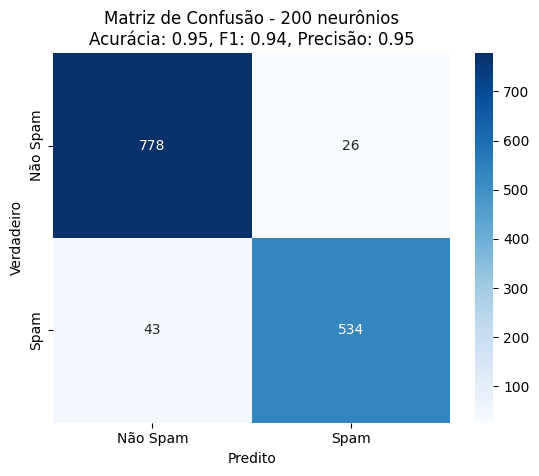


=== Modelo com 300 camadas ===

Top 5 features mais relevantes:
                       Feature  Importance
52  capital_run_length_average    0.203478
43               word_freq_edu    0.193660
24                word_freq_hp    0.168787
42                word_freq_re    0.151109
36                word_freq_pm    0.147208


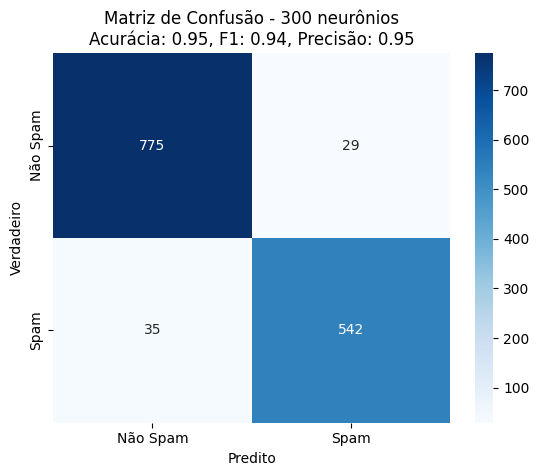


=== Modelo com 500 camadas ===

Top 5 features mais relevantes:
                       Feature  Importance
52  capital_run_length_average    0.203016
43               word_freq_edu    0.169622
42                word_freq_re    0.141329
24                word_freq_hp    0.136918
53  capital_run_length_longest    0.129573


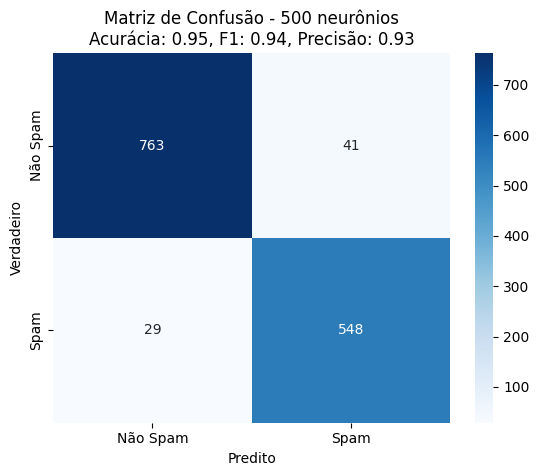

In [21]:
# ------------------------- MLP Classifier -------------------------
hidden_layers = [ 50, 100, 200, 300, 500]  # Número de neurônios nas camadas ocultas
results_nn = []

def count_mlp_params(mlp):
    n_params = 0
    for weights in mlp.coefs_:
        n_params += weights.size
    for bias in mlp.intercepts_:
        n_params += bias.size
    return n_params

for layer in hidden_layers:
    print(f"\n=== Modelo com {layer} camadas ===")
    
    model = MLPClassifier(
        hidden_layer_sizes=(layer,), 
        max_iter=1000,
        solver='adam', 
        random_state=42
    )
    
    model.fit(X_train_scaled, y_train)
    
    # Métricas de classificação
    y_pred = model.predict(X_test_scaled) # predições corretas no geral
    acc = accuracy_score(y_test, y_pred) # acurácia do modelo
    f1 = f1_score(y_test, y_pred) # média harmônica entre precisão e recall
    precision = precision_score(y_test, y_pred) # predição correta de spam
    
    # Complexidade
    n_params = count_mlp_params(model)
    
    results_nn.append({
        'hidden_layers': layer,
        'n_params': n_params,
        'Accuracy': acc,
        'F1_score': f1,
        'Precision': precision
    })

    # Features relevantes
    weights = model.coefs_[0]
    feature_importance = np.mean(np.abs(weights), axis=1)
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)

    print("\nTop 5 features mais relevantes:")
    print(importance_df.head())
    
    # Plot da matriz de confusão (melhor para classificação)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Não Spam', 'Spam'], 
                yticklabels=['Não Spam', 'Spam'])
    plt.title(f'Matriz de Confusão - {layer} neurônios\nAcurácia: {acc:.2f}, F1: {f1:.2f}, Precisão: {precision:.2f}')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.show()




---

### 3. Critérios de Avaliação:
**Erro de predição**: utilizar métricas como MSE, RMSE, acurácia, F1-score, conforme o tipo de problema.

**Complexidade do modelo**:
* **Redes neurais**: número de parâmetros treináveis.
* **Árvores de decisão**: profundidade ou número de nós.
* **Random Forest**: número de árvores e profundidade média.

In [22]:
# ------------------------- Visualização das métricas -------------------------
print("\nResultados da MLP:")
df_results_nn = pd.DataFrame(results_nn)
print(df_results_nn.sort_values('Accuracy', ascending=False))



Resultados da MLP:
   hidden_layers  n_params  Accuracy  F1_score  Precision
3            300     17101  0.953657  0.944251   0.949212
2            200     11401  0.950036  0.939314   0.953571
4            500     28501  0.949312  0.939966   0.930390
1            100      5701  0.946416  0.934744   0.951526
0             50      2851  0.944967  0.933566   0.941799


In [13]:
print("\nResultados do Random Forest:")
df_results_rf = pd.DataFrame(results_rf)
print(df_results_rf.sort_values('Accuracy', ascending=False))


Resultados do Random Forest:
    n_estimators  max_depth  avg_depth  n_params  Accuracy  F1_score  \
3             50        NaN     21.360     12302  0.942795  0.929401   
2             50       30.0     21.320     12290  0.942795  0.929527   
11           200        NaN     20.885     49214  0.942071  0.928571   
7            100        NaN     21.320     24606  0.942071  0.928699   
10           200       30.0     20.875     49202  0.942071  0.928571   
6            100       30.0     21.300     24594  0.941347  0.927743   
5            100       10.0     10.000     16420  0.939175  0.924324   
9            200       10.0     10.000     33070  0.938450  0.923767   
1             50       10.0     10.000      8526  0.934106  0.918239   
0             50        5.0      5.000      2362  0.923968  0.902868   
8            200        5.0      5.000      9478  0.923968  0.903047   
4            100        5.0      5.000      4668  0.922520  0.900650   

    Precision  
3    0.959410  
2

In [14]:
print("\nResultados do Decision Tree:")
df_results_dt = pd.DataFrame(results_dt)
print(df_results_dt.sort_values('Accuracy', ascending=False))


Resultados do Decision Tree:
   max_depth_set  actual_depth  n_nodes  Accuracy  F1_score  Precision
2           10.0            10      159  0.905865  0.883513   0.914657
4            NaN            22      267  0.905865  0.885764   0.898396
3           20.0            20      263  0.903693  0.882405   0.900722
1            5.0             5       41  0.900072  0.874773   0.918095
0            3.0             3       15  0.862419  0.811508   0.948956


In [24]:
# ------------------------- Análise Multiobjetivo -------------------------

# Adicionar coluna de modelo para cada DataFrame
df_results_nn['model'] = 'MLP Classifier'
df_results_rf['model'] = 'Random Forest'
df_results_dt['model'] = 'Decision Tree'

# Selecionando apenas colunas relevantes
df_results_dt = df_results_dt[['n_nodes', 'Accuracy', 'F1_score', 'Precision']]
df_results_dt['n_params'] = df_results_dt['n_nodes']
df_results_rf = df_results_rf[['n_params', 'Accuracy', 'F1_score', 'Precision']]
df_results_nn = df_results_nn[['n_params', 'Accuracy', 'F1_score', 'Precision']]

# Unificando resultados em um dataframe
df_all = pd.concat([
    df_results_nn.assign(model='MLP Classifier'),
    df_results_rf.assign(model='Random Forest'),
    df_results_dt.assign(model='Decision Tree')
], ignore_index=True)

print(df_all.sort_values('Accuracy', ascending=False))

    n_params  Accuracy  F1_score  Precision           model  n_nodes
3      17101  0.953657  0.944251   0.949212  MLP Classifier      NaN
2      11401  0.950036  0.939314   0.953571  MLP Classifier      NaN
4      28501  0.949312  0.939966   0.930390  MLP Classifier      NaN
1       5701  0.946416  0.934744   0.951526  MLP Classifier      NaN
0       2851  0.944967  0.933566   0.941799  MLP Classifier      NaN
7      12290  0.942795  0.929527   0.957721   Random Forest      NaN
8      12302  0.942795  0.929401   0.959410   Random Forest      NaN
16     49214  0.942071  0.928571   0.957643   Random Forest      NaN
12     24606  0.942071  0.928699   0.955963   Random Forest      NaN
15     49202  0.942071  0.928571   0.957643   Random Forest      NaN
11     24594  0.941347  0.927743   0.955882   Random Forest      NaN
10     16420  0.939175  0.924324   0.962477   Random Forest      NaN
14     33070  0.938450  0.923767   0.957249   Random Forest      NaN
6       8526  0.934106  0.918239  

---

### 4. Otimização Multiobjetivo:
Utilizar alguma abordagem para encontrar modelos que equilibrem desempenho e complexidade, como:
- Busca em grade ou aleatória com análise biobjetiva.
- Algoritmos evolutivos (como NSGA-II, se desejado).
- Análise e visualização da fronteira de Pareto.

In [25]:
def is_pareto_efficient(df):
    data = df[['n_params', 'Accuracy']].copy()
    # Muda R² para -R² para poder usar algoritmo de minimização
    data['Accuracy'] = -data['Accuracy']
    # Convertendo para numpy array
    costs = data.to_numpy()
    
    # Inicializa um array booleano para identificar soluções eficientes
    is_efficient = np.ones(costs.shape[0], dtype=bool)

    for i, c in enumerate(costs):
        if is_efficient[i]:
            # Verifica se há outras soluções que são melhores ou iguais em todos os objetivos
            # descarta soluções que são dominadas
            is_efficient[is_efficient] = (
                np.any(costs[is_efficient] < c, axis=1) | 
                np.all(costs[is_efficient] == c, axis=1)
            )
            is_efficient[i] = True # garante que a solução atual é considerada eficiente
    return is_efficient


df_all['pareto'] = is_pareto_efficient(df_all)
pareto_df = df_all[df_all['pareto']] # DataFrame com soluções eficientes de Pareto


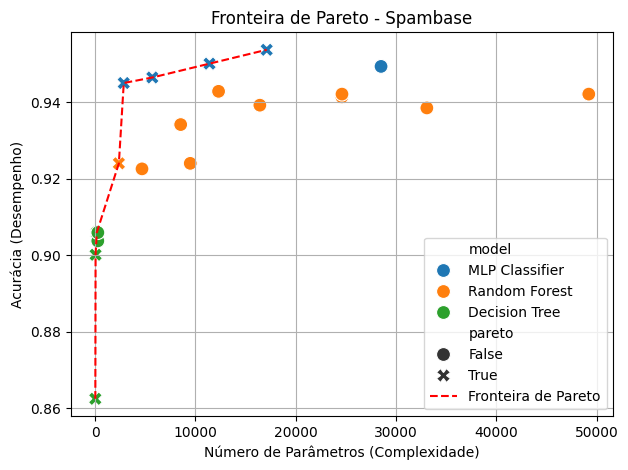

In [26]:
# ------------------------- Visualização da Fronteira de Pareto -------------------------
sns.scatterplot(
    data=df_all, 
    x='n_params', 
    y='Accuracy', 
    hue='model', 
    style='pareto', 
    s=100)

pareto_sorted = pareto_df.sort_values('n_params')

plt.plot(
    pareto_sorted['n_params'], 
    pareto_sorted['Accuracy'], 
    linestyle='--', 
    color='red', 
    label='Fronteira de Pareto')


plt.xlabel('Número de Parâmetros (Complexidade)')
plt.ylabel('Acurácia (Desempenho)')
plt.title('Fronteira de Pareto - Spambase')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Melhores Modelos
1. **MLP (hidden_layers = 300) - 0.95** 

todos os modelos foram bem, com acurácia alta e com um modelo com pouco números de parâmetros (complexidade). maioria dos modelos apareceram na fronteira.

2. **Random Forest (max_depth: None/30, n_estimators= 50) - 0.94**

apenas um modelo apareceu na fronteira, mas todos tiveram no geral uma acurácia elevada, ainda que inferior a MLP. foi o modelo que mais teve complexidade.

3. **Decision Tree (max_depth = 10) - 0.90**

pior acurácia, bem inferior as outras, mas quase todos os modelos apareceram na fronteira de pareto, já que utilizaram muito poucos parâmetros comparado com os outros modelos. para esse dataset, um número mais alto de parâmetros é importante para melhorar as métricas.

## Observações
Os modelos tiveram priorizaram algumas features em comum, como a `capital_run_length_average`, `char_freq_$`, `char_freq_!`, `word_freq_remove` e `word_freq_your`, que são basicamente indicadores de textos de spam que prometem/envolvem algum dinheiro (o cifrão), abusam de elementos para chamarem atenção (caixa alta e exclamação), aproximação (como a palavra "your") para parecer pessoal e até dão a opção de parar de receber e-mails (remove) como forma de fazer alguém clicar em um link. 

No caso do MLP Classifier, vemos como principais features: `capital_run_length_average`, `word_freq_edu`, `word_freq_hp`, `word_freq_re` e `word_freq_pm`. Poderíamos assumir que o modelo tentou focar em spams que tentassem simular credibilidade (usando domínio educacional, empresas reais, formalidade) ou que usou de e-mails geralmente legitimos para excluir os spams. No caso do uso da frequência de PM, indicativo de tempo, podemos considerar que provavelmente estava se tratando de ofertas "relâmpagos" que e-mails tipo spam tentam fazer para o usuário ter uma ação rápida sobre ele, além do uso de letras maiúsculas como mencionado anteriormente.
